In [1]:
import sympy as sym

import numpy as np

import evol_dynamics

from sympy import mathematica_code

In [2]:
def imitation_probability(utility_of_resident, utility_of_mutant, strength_of_selection):
    return 1 / (
        1
        + sym.exp(
            -strength_of_selection * (utility_of_mutant - utility_of_resident)
        )
    )

In [3]:
q = sym.symbols("q")

b, c, N, k, beta, delta = sym.symbols("b, c, N, k, beta, \delta")

In [4]:
alld = (0, 0, 0)

gtft = (1, 1, q)

In [5]:
k = 1

In [6]:
payoffs = np.array([b - c, -c, b, 0])

stationary_RR = evol_dynamics.expected_distribution_last_round(gtft, gtft, delta)

stationary_RM = evol_dynamics.expected_distribution_last_round(gtft, alld, delta)

stationary_MR = evol_dynamics.expected_distribution_last_round(alld, gtft, delta)

stationary_MM = evol_dynamics.expected_distribution_last_round(alld, alld, delta)

The probability that the number of mutants increases or decreases by one is given by,

\begin{align}
\lambda^+ = & \frac{1}{N -1} \rho\left(\pi_R (S_R, S_M), \pi_M (S_M, S_R)\right) + \frac{N -2}{N-1}[\\ 
& \frac{(k - 1)(k - 2)}{(N-2)(N-3)} \rho\left(\pi_R (S_R, S_M), \pi_M (S_M, S_M)\right) + \\
& \frac{(k - 1)(N - k - 1)}{(N-2)(N-3)} \rho\left(\pi_R (S_R, S_M), \pi_M (S_M, S_R)\right) + \\
& \frac{(N - k - 1)(k - 1)}{(N-2)(N-3)} \rho\left(\pi_R (S_R, S_R), \pi_M (S_M, S_M)\right) + \\
& \frac{(N - k - 1)(N - k - 2)}{(N-2)(N-3)} \rho\left(\pi_R (S_R, S_R), \pi_M (S_M, S_R)\right)]
\end{align}


\begin{align}
\lambda^- = & \frac{1}{N -1} \rho\left(\pi_M (S_M, S_R), \pi_R (S_R, S_M)\right) + \frac{N -2}{N-1}[\\ 
& \frac{(k - 1)(k - 2)}{(N-2)(N-3)} \rho\left(\pi_M (S_M, S_M), \pi_R (S_R, S_M)\right) + \\
& \frac{(k - 1)(N - k - 1)}{(N-2)(N-3)} \rho\left(\pi_M (S_M, S_R), \pi_R (S_R, S_M)\right) + \\
& \frac{(N - k - 1)(k - 1)}{(N-2)(N-3)} \rho\left(\pi_M (S_M, S_M), \pi_R (S_R, S_R)\right) + \\
& \frac{(N - k - 1)(N - k - 2)}{(N-2)(N-3)} \rho\left(\pi_M (S_M, S_R), \pi_R (S_R, S_R)\right)]
\end{align}

In the case of 1 mutant ($k=1$),

$$\lambda^+ = \frac{1}{N-1} \rho\left(\pi_R (S_R, S_M), \pi_M (S_M, S_R)\right) +  \frac{N -2}{N-1} \rho\left(\pi_R (S_R, S_R), \pi_M (S_M, S_R)\right)$$

$$\lambda^- = \frac{1}{N-1} \rho\left(\pi_M (S_M, S_R), \pi_R (S_R, S_M)\right) +  \frac{N -2}{N-1} \rho\left(\pi_M (S_M, S_R), \pi_R (S_R, S_R)\right)$$

In [7]:
pMM = (stationary_MM @ payoffs).factor()

pMR = (stationary_MR @ payoffs).factor()

pRR = (stationary_RR @ payoffs).factor()

pRM = (stationary_RM @ payoffs).factor()

In [8]:
print(sym.latex(pRM.collect(delta)))

- c \left(\delta \left(q - 1\right) + 1\right)


In [32]:
laplus = (1 / (N - 1) * imitation_probability(pRM, pMR, beta) + ((N - 2) / (N - 1)/ (N - 2) / (N - 3)) * (
         (k - 1) * (k - 2) * imitation_probability(pRM, pMM, beta) +
         (k - 1) * (N - k - 1) * imitation_probability(pRM, pMR, beta) + 
         (N - k - 1) * (k - 1) * imitation_probability(pRR, pMM, beta) +
         (N - k - 1) * (N - k - 2) * imitation_probability(pRR, pMR, beta)))

In [33]:
lminus = (1 / (N - 1) * imitation_probability(pMR, pRM, beta) + ((N - 2) / (N - 1)/ (N - 2) / (N - 3)) * (
         (k - 1) * (k - 2) * imitation_probability(pMM, pRM, beta) +
         (k - 1) * (N - k - 1) * imitation_probability(pMR, pRM, beta) + 
         (N - k - 1) * (k - 1) * imitation_probability(pMM, pRR, beta) +
         (N - k - 1) * (N - k - 2) * imitation_probability(pMR, pRR, beta)))

In [34]:
ratio =  lminus / laplus

In [35]:
ratio

((N - 2)/((1 + exp(-beta*(-b*(\delta*q - \delta + 1) + b - c)))*(N - 1)) + 1/((1 + exp(-beta*(-b*(\delta*q - \delta + 1) - c*(\delta*q - \delta + 1))))*(N - 1)))/((N - 2)/((1 + exp(-beta*(b*(\delta*q - \delta + 1) - b + c)))*(N - 1)) + 1/((1 + exp(-beta*(b*(\delta*q - \delta + 1) + c*(\delta*q - \delta + 1))))*(N - 1)))

In [46]:
print(sym.latex((pMR - pRM).factor()))

\left(b + c\right) \left(\delta q - \delta + 1\right)


In [53]:
print(sym.latex(((pRR - pMR).factor() * - beta).factor().collect(b)))

\beta \left(b \left(\delta q - \delta\right) + c\right)


In [54]:
print(sym.latex(((pMR - pRR).factor() * - beta).factor().collect(b)))

- \beta \left(b \left(\delta q - \delta\right) + c\right)


In [19]:
print(sym.latex(ratio))

\frac{\frac{N - 2}{\left(1 + e^{- \beta \left(- b \left(\delta q - \delta + 1\right) + b - c\right)}\right) \left(N - 1\right)} + \frac{1}{\left(1 + e^{- \beta \left(- b \left(\delta q - \delta + 1\right) - c \left(\delta q - \delta + 1\right)\right)}\right) \left(N - 1\right)}}{\frac{N - 2}{\left(1 + e^{- \beta \left(b \left(\delta q - \delta + 1\right) - b + c\right)}\right) \left(N - 1\right)} + \frac{1}{\left(1 + e^{- \beta \left(b \left(\delta q - \delta + 1\right) + c \left(\delta q - \delta + 1\right)\right)}\right) \left(N - 1\right)}}


In [12]:
sym.nsimplify(sym.limit(ratio, N, sym.oo))

(exp(-\delta*b*beta*q + \delta*b*beta - beta*c) + 1)/(exp(\delta*b*beta*q - \delta*b*beta + beta*c) + 1)

In [13]:
writen =  (1 + sym.exp(-beta * (b *(delta * q - delta) + c))) / (1 + sym.exp(beta * (b *(delta * q - delta) + c)))

In [37]:
writen

(1 + exp(-beta*(b*(\delta*q - \delta) + c)))/(exp(beta*(b*(\delta*q - \delta) + c)) + 1)

In [14]:
(writen - sym.nsimplify(sym.limit(ratio, N, sym.oo))).factor()

0

In [38]:
print(sym.latex(writen))

\frac{1 + e^{- \beta \left(b \left(\delta q - \delta\right) + c\right)}}{e^{\beta \left(b \left(\delta q - \delta\right) + c\right)} + 1}


In [41]:
sym.limit(1 / (N -1), N, sym.oo)

0

**Data**

In [1]:
import pandas as pd

In [8]:
dfh = pd.read_csv("../to_archieve/clean_test_high_benefit_one.csv")

In [9]:
dfl = pd.read_csv("../to_archieve/clean_test_low_benefit_one.csv")

In [10]:
[round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) for df in [dfl, dfh]]

[0.51, 0.96]

In [8]:
round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 

0.96

In [49]:
dflow = pd.read_csv("../to_archieve/clean_two_rounds_low_benefit_fix.csv")

In [51]:
sum(dflow['average cooperation rate'] * (dflow['frequencies'] / 10 ** 7))

0.48966094409735694

In [98]:
c = 1
b = 3
delta = 0.999

In [99]:
1 - c / (9 * delta)

0.8887776665554443

In [100]:
dfhigh = pd.read_csv("../to_archieve/clean_one_interaction_high_benefit.csv")

In [101]:
sum(dfhigh['average cooperation rate'] * (dfhigh['frequencies'] / 10 ** 7))

0.9607213402300009

**Plotting**

In [113]:
import matplotlib.pyplot as plt

import matplotlib

import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [103]:
heatmaps, extents = [], []
    
for df in [dflow, dfhigh]:

    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)


    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    heatmaps.append(heatmap)
    extents.append(extent)

In [104]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

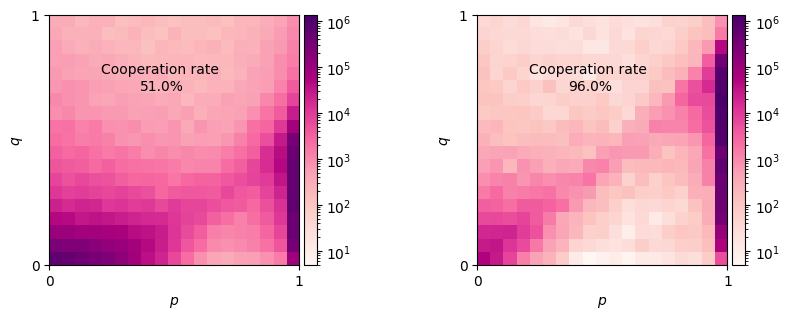

In [114]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7.5))


cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in [dflow, dfhigh]]

for i, heatmap in enumerate(heatmaps):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=matplotlib.cm.get_cmap("RdPu"),
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")
    
    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                 horizontalalignment='center')


fig.tight_layout();

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.6, hspace=None)